In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

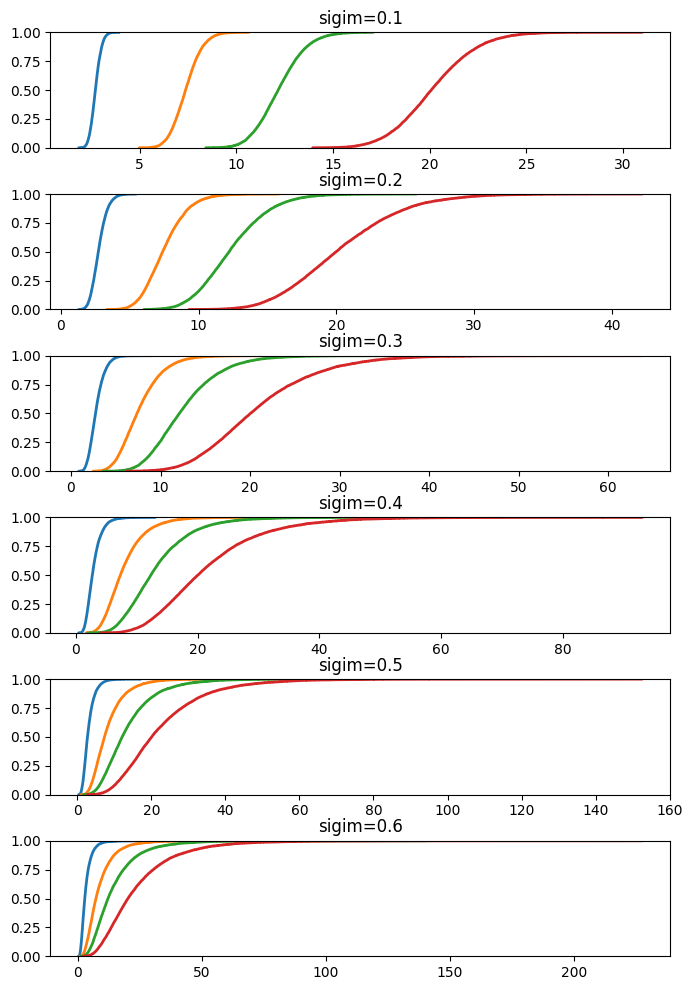

In [16]:
def plot_log_normal(means, vars):
    fig, ax = plt.subplots(len(vars), 1, figsize=(8, 2 * len(vars)))
    fig.subplots_adjust(hspace=0.4)
    for i, v in enumerate(vars):
        for m in means:
            x = np.random.lognormal(m, v, 10000)
            ax[i].ecdf(x, label=f'u={m}', lw=2)
            ax[i].set_title(f'sigim={v}')
    plt.show()

# plot_log_normal([1, 2, 3, 4, 5, 6], [0.1, 0.2, 0.3, 0.4])
plot_log_normal([1, 2, 2.5, 3], [0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

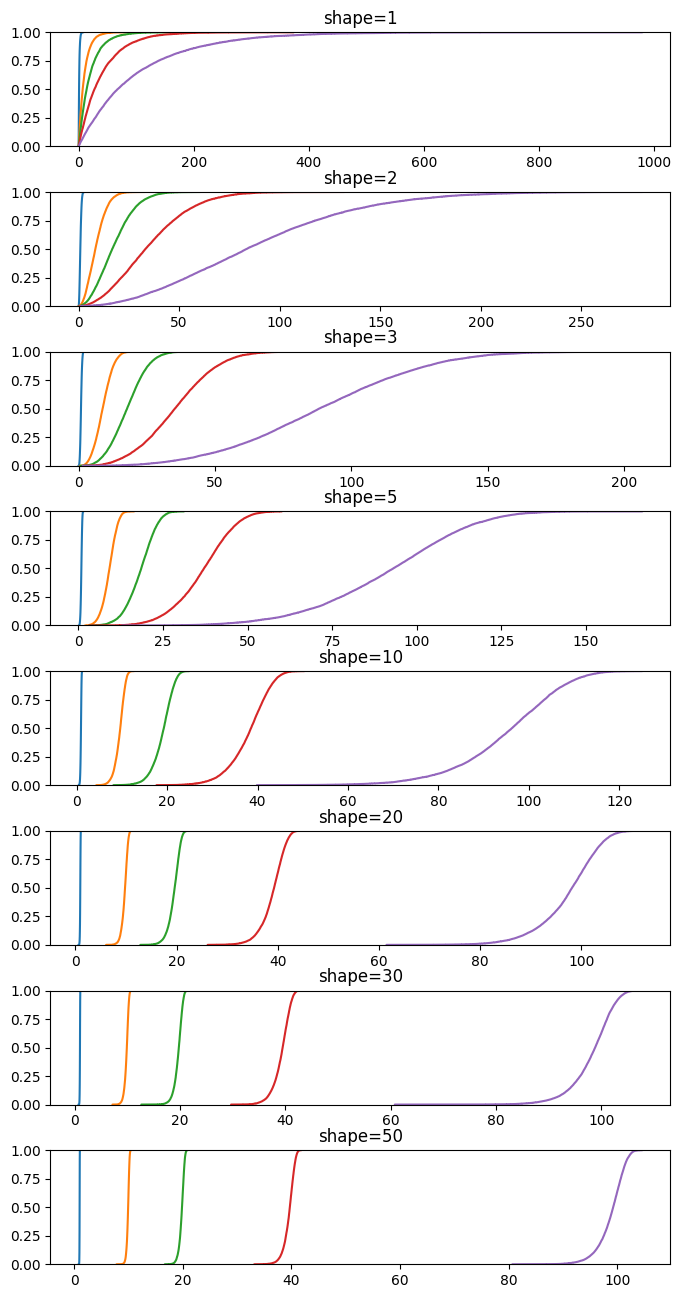

In [18]:
def plot_weibull(shapes, scales):
    fig, ax = plt.subplots(len(shapes), 1, figsize=(8, 2 * len(shapes)))
    fig.subplots_adjust(hspace=0.4)
    for i, shape in enumerate(shapes):
        for scale in scales:
            x = np.random.weibull(shape, 10000) * scale
            ax[i].ecdf(x, label=f'scale={scale}')
            ax[i].set_title(f'shape={shape}')
    plt.show()

# plot_weibull([1, 2, 5, 10, 50], [1, 10, 20, 50, 100, 200, 400])
plot_weibull([1, 2, 3, 5, 10, 20, 30, 50], [1, 10, 20, 40, 100])

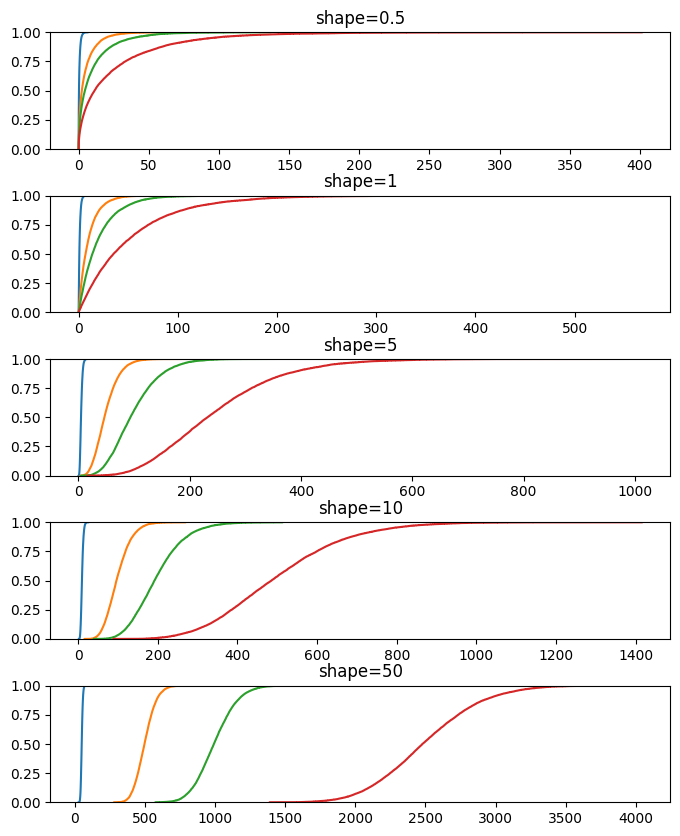

In [5]:
def plot_gamma(shapes, scales):
    fig, ax = plt.subplots(len(shapes), 1, figsize=(8, 2 * len(shapes)))
    fig.subplots_adjust(hspace=0.4)
    for i, shape in enumerate(shapes):
        for scale in scales:
            x = np.random.gamma(shape, scale, 10000)
            ax[i].ecdf(x, label=f'scale={scale}')
            ax[i].set_title(f'shape={shape}')
    plt.show()

plot_gamma([0.5, 1, 5, 10, 50], [1, 10, 20, 50])

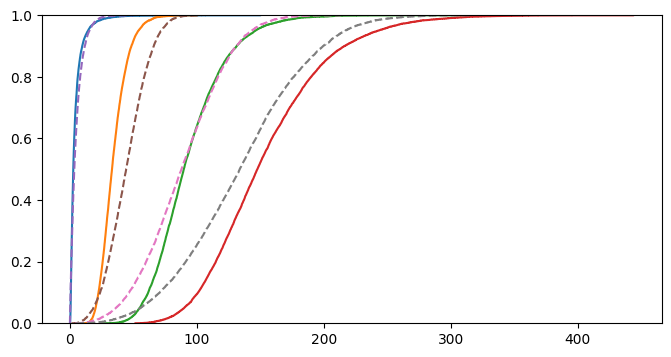

In [6]:
fig, ax = plt.subplots(figsize=(8, 4))

weibull = 5 * np.random.weibull(1, 10000)
lognormal_1 = np.random.lognormal(1, 1, 10000)
# lognormal_11 = np.random.lognormal(2.5, 0.3, 10000)
lognormal_2 = np.random.lognormal(3.5, 0.3, 10000)
lognormal_3 = np.random.lognormal(4.5, 0.3, 10000)
lognormal_4 = np.random.lognormal(5, 0.3, 10000)
# weibull_2 = 120 * np.random.weibull(5, 10000)

weibull = 5 * np.random.weibull(1, 10000)
weibull_2 = 50 * np.random.weibull(3, 10000)
weibull_3 = 100 * np.random.weibull(3, 10000)
weibull_4 = 150 * np.random.weibull(3, 10000)

# ax.ecdf(weibull, label='weibull')
ax.ecdf(lognormal_1, label='lognormal_1')
# ax.ecdf(lognormal_1, label='lognormal_1')
# ax.ecdf(lognormal_11, label='lognormal_11')
ax.ecdf(lognormal_2, label='lognormal_2')
ax.ecdf(lognormal_3, label='lognormal_3')
ax.ecdf(lognormal_4, label='lognormal_4')

ax.ecdf(weibull, label='weibull_2', linestyle='--')
ax.ecdf(weibull_2, label='weibull_2', linestyle='--')
ax.ecdf(weibull_3, label='weibull_3', linestyle='--')
ax.ecdf(weibull_4, label='weibull_4', linestyle='--')

# ax.ecdf(weibull_2, label='weibull_2')
plt.show()

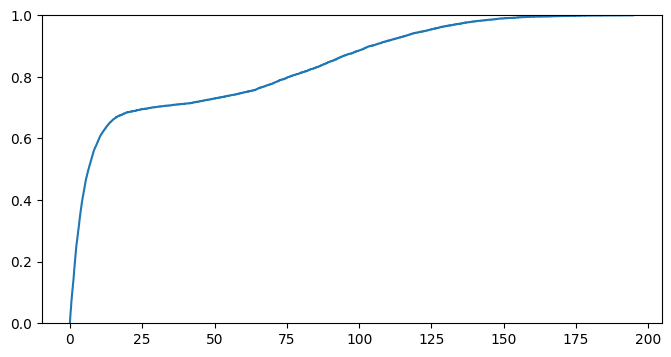

In [20]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import eval.runner.distribution as dist

fig, ax = plt.subplots(figsize=(8, 4))

markov = dist.MarkovModulatedDistribution_2(
    dists=[dist.WeibullParam(1, 5), dist.WeibullParam(3, 100)],
    trans_prob=[0.3, 0.7],
    seed=np.random.randint(0, 1000))
x = [markov.get() for _ in range(10000)]
ax.ecdf(x, label='markov')
plt.show()